In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded=files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [4]:
data=pd.read_csv('Mall_Customers.csv')
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [13]:
# defining the X

x=data[['Annual Income (k$)','Spending Score (1-100)']]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [14]:
from sklearn.cluster import KMeans

In [15]:
wcss=[]
for i in range (1,11):
  kmeans=KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

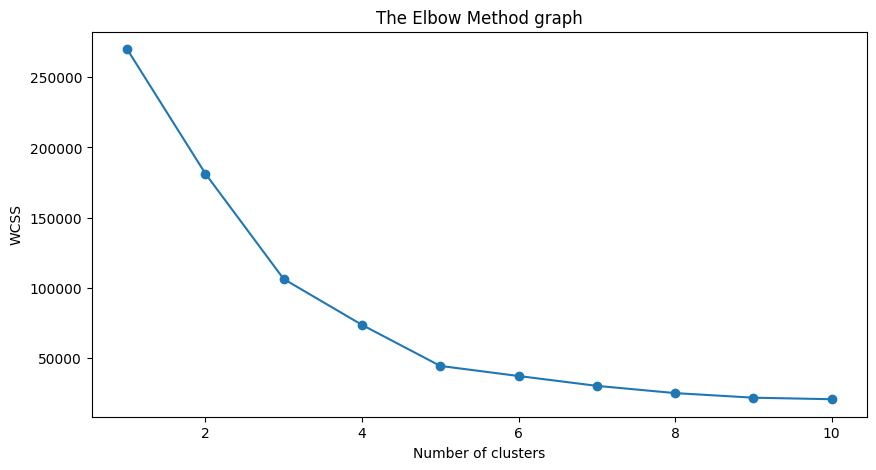

In [19]:
#ploting the elbow method

plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss,marker='o')
plt.title('The Elbow Method graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# from this graph we identified 5 clusters

In [20]:
#applying kmeans clusteering with option
#num of clusters

kmeans=KMeans(n_clusters=5, init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=kmeans.fit_predict(x)

In [21]:
y_means

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [22]:
data['Cluster']=y_means
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


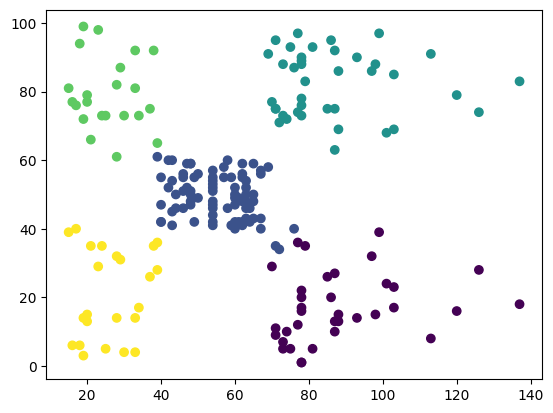

In [23]:
# plotting the clusters
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=y_means)
plt.show()

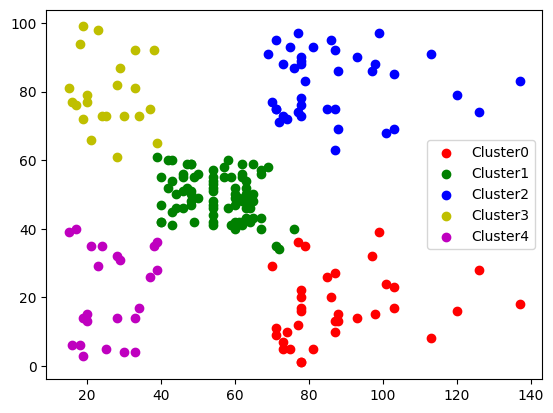

In [30]:
colors=['r','g','b','y','m']
for i in range(5):
  cluster_data=x[y_means==i]
  plt.scatter(cluster_data['Annual Income (k$)'],cluster_data['Spending Score (1-100)'],c=colors[i],label=f'Cluster{i}')
  plt.legend()
  #plt.show()

In [39]:
# function to predict for new customer

def predict_cluster(annual_income,spending_score):
  new_data=[[annual_income,spending_score]]
  cluster=kmeans.predict(new_data)
  return cluster[0]

In [40]:
new_customer_income=90
new_customer_spendingscore=80

predict_cluster=predict_cluster(new_customer_income,new_customer_spendingscore)
print(f'The customer belongs to cluster:{predict_cluster}')

The customer belongs to cluster:2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
